In [1]:
# Moving Average Strategy Simulation

import matplotlib.pyplot as plt
import random as rm
import itertools as it

# Simulate 100 days of random price data using a multiplicative model
def simulate_100() -> list[float]:
    """
    Simulates a 100-day price series using a random walk with daily returns
    uniformly sampled from [-5%, +5%].
    """
    price_seq = [100.0]  # Start price at 100

    for _ in range(99):  # 99 additional days
        change = 1 + rm.uniform(-0.05, 0.05)
        price_seq.append(price_seq[-1] * change)

    return price_seq

In [2]:
# Define Moving Average Crossover Strategy
def moving_avg(prices: list[float]) -> list[float]:
    """
    Implements a moving average crossover strategy.
    Short MA = 5 days, Long MA = 20 days.
    
    Buy signal: short crosses above long
    Sell signal: short crosses below long
    
    P&L is computed by the price difference the next day after signal.
    """
    pnl = []

    for i in range(len(prices) - 21):  # enough days for both MAs and one-day forward price
        short_prev = sum(prices[i+15:i+20]) / 5
        long_prev = sum(prices[i:i+20]) / 20

        short_now = sum(prices[i+16:i+21]) / 5
        long_now = sum(prices[i+1:i+21]) / 20

        # Detect crossover signals
        if short_prev <= long_prev and short_now > long_now:
            # Buy: profit = next day's rise
            pnl.append(prices[i+21] - prices[i+20])

        elif short_prev >= long_prev and short_now < long_now:
            # Sell: profit = price drop captured by shorting
            pnl.append(prices[i+20] - prices[i+21])

        else:
            pnl.append(0.0)  # No action → no profit or loss

    return pnl


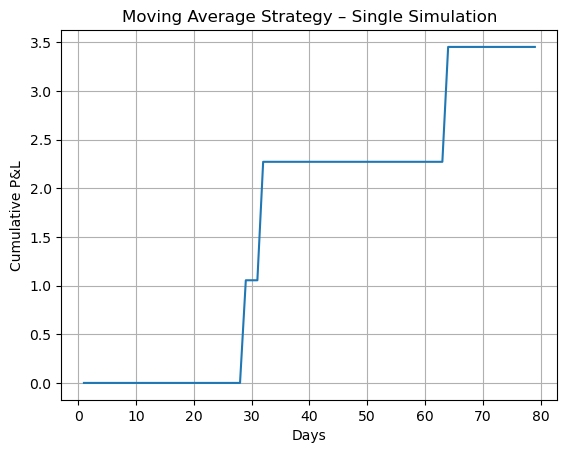

In [5]:
# Visualize cumulative P&L of a single run
prices = simulate_100()
pnl = moving_avg(prices)  # Simulate once
cumulative_pnl = list(it.accumulate(pnl))  # Cumulative sum of P&L

plt.plot(range(1, len(cumulative_pnl) + 1), cumulative_pnl)
plt.xlabel("Days")
plt.ylabel("Cumulative P&L")
plt.title("Moving Average Strategy – Single Simulation")
plt.grid()
plt.show()


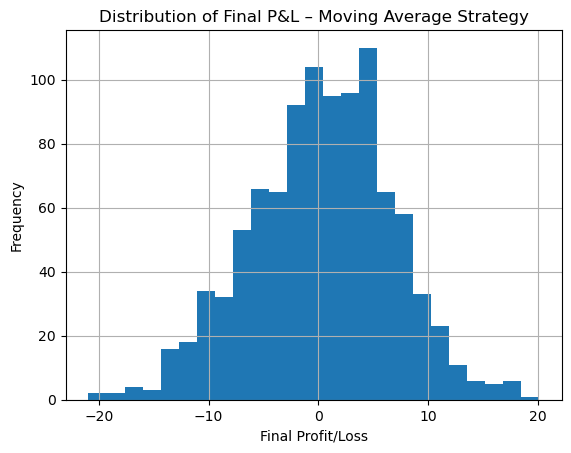

In [4]:
# Histogram of Final P&L across multiple runs
final_pnl = []

for _ in range(1000):  # Run strategy 1000 times
    prices = simulate_100()
    pnl = moving_avg(prices)
    cumulative_pnl = list(it.accumulate(pnl))
    final_pnl.append(cumulative_pnl[-1])  # Final cumulative P&L of that run

plt.hist(final_pnl, bins=25)
plt.title("Distribution of Final P&L – Moving Average Strategy")
plt.xlabel("Final Profit/Loss")
plt.ylabel("Frequency")
plt.grid()
plt.show()
